In [1]:
import numpy as np
import math
import random as rd
import matplotlib.pyplot as plt

In [2]:
numpy_array = np.genfromtxt("/home/rimcrusher/Documents/ML Courses/ML_From_Scratch/Data.csv", delimiter=",")
#print(numpy_array)
#print(numpy_array.ndim)
#print(numpy_array.shape)
#print(numpy_array.size)
#print(len(numpy_array))

In [3]:
#numpy_array - datapoints
#k - number of clusters
#z - cluster to which x belongs
#mean - mean of each cluster in current iteration
#error - used to find minimum error in current iteration of each points

k = 4
#init z as 0
z = np.zeros(numpy_array.size, dtype = int)
#init mean as first 4 elements
mean = [numpy_array[0],numpy_array[1],numpy_array[2],numpy_array[3]]

#calculate z w.r.t. minimum error
# for i in range(numpy_array.size):
#     error = np.array([])
#     for mu in mean:
#         error = np.append(error,(numpy_array[i]-mu)**2)
#     z[i] = error.argmin()
#print(z)

for i in range(numpy_array.size):
    z[i] = rd.randint(0,3)
# print(z)

z_init = np.array([])
for i in z:
    z_init = np.append(z_init,i)
    
# print(z_init)
#print(mean)
iterations = 10

#traverse for each iteration
mean_main = np.array([])
for t in range(iterations):
    #init mean and cnt(calculate n(datapoint) in each cluster) at every iteration
    mean = np.zeros(k)
    cnt = np.zeros(k, dtype = int)
    #calculate mean
    for i in range(z.size):
        #print(mean[z[i]])
        mean[z[i]] = mean[z[i]] + numpy_array[i]
        cnt[z[i]] = cnt[z[i]] + 1
    #print(mean)
    #print(cnt)
    for i in range(mean.size):
        if(math.isnan(mean[i]/cnt[i])):
            mean[i] = 0
        else:
            mean[i] = mean[i]/cnt[i]
    #print(mean)
    #calculate z w.r.t. minimum error
    for i in range(numpy_array.size):
        error = np.array([])
        for mu in mean:
            error = np.append(error,(numpy_array[i]-mu)**2)
        z[i] = error.argmin()
    #print(z) 
    compare = (mean == mean_main)
    if(np.all(compare)):
        break
    mean_main = mean
    


/tmp/ipykernel_24992/3726446790.py:59: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  compare = (mean == mean_main)
/tmp/ipykernel_24992/3726446790.py:47: RuntimeWarning: invalid value encountered in double_scalars
  if(math.isnan(mean[i]/cnt[i])):


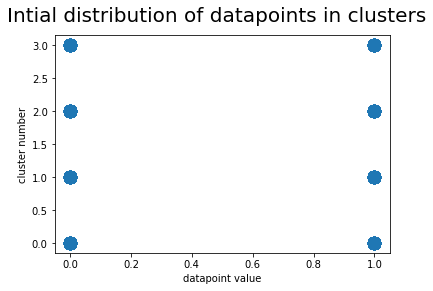

In [4]:
plt.suptitle('Intial distribution of datapoints in clusters', fontsize=20)
plt.ylabel("cluster number")
plt.xlabel("datapoint value")
plt.scatter(numpy_array[:], z_init[:], s=150)
plt.show()

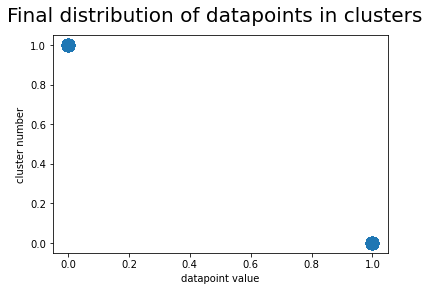

In [5]:
plt.suptitle('Final distribution of datapoints in clusters', fontsize=20)
plt.ylabel("cluster number")
plt.xlabel("datapoint value")
plt.scatter(numpy_array[:], z[:], s=150)
plt.show()